In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from matplotlib.colors import LogNorm
from astropy.visualization import ImageNormalize, LinearStretch, AsinhStretch, SqrtStretch 
import matplotlib.lines as lines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.image as mpimg

%matplotlib inline

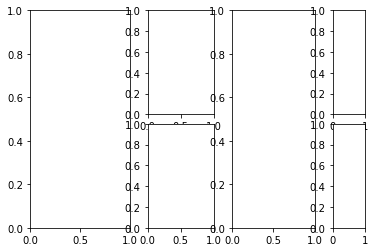

In [48]:
#fig = plt.figure()


#subplot2grid(shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)
#ax = subplot2grid((nrows, ncols), (row, col), rowspan, colspan)  

#ax1 = plt.subplot2grid((4, 40), (0, 0), colspan=12, rowspan=4)
#ax2 = plt.subplot2grid((4, 40), (0, 14), colspan=8, rowspan=2)
#ax3 = plt.subplot2grid((4, 40), (2, 14), colspan=8, rowspan=2)
#ax4 = plt.subplot2grid((4, 40), (0, 24), colspan=10, rowspan=4)
#ax5 = plt.subplot2grid((4, 40), (0, 36), colspan=8, rowspan=2)
#ax6 = plt.subplot2grid((4, 40), (2, 36), colspan=8, rowspan=2)



#plt.tight_layout()

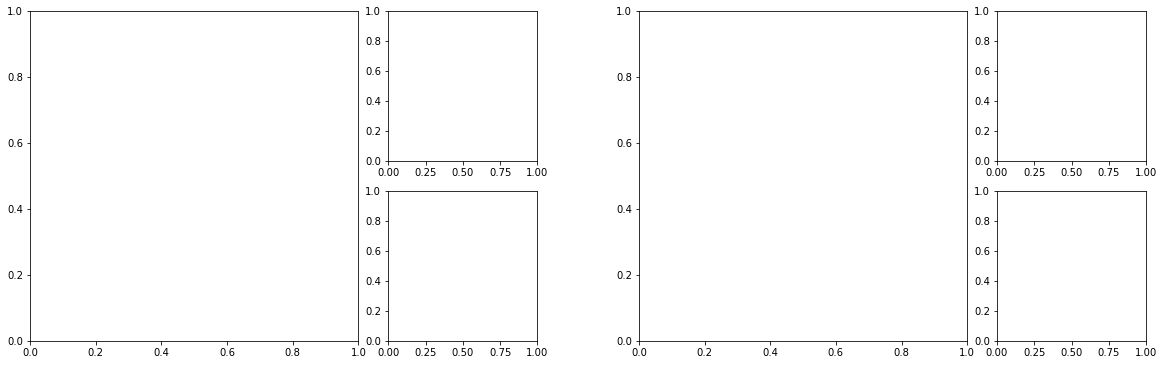

In [14]:
#fig = plt.figure(figsize=(20,16))

#gs0 = gridspec.GridSpec(1, 2, figure=fig)
#gs00 = gridspec.GridSpecFromSubplotSpec(5, 3, subplot_spec=gs0[0])

#ax1 = fig.add_subplot(gs00[:2, :2])
#ax2 = fig.add_subplot(gs00[0, -1])
#ax3 = fig.add_subplot(gs00[1, -1])

#gs01 = gs0[1].subgridspec(5, 3)

#ax4 = fig.add_subplot(gs01[:2, :2])
#ax5 = fig.add_subplot(gs01[0, -1])
#ax6 = fig.add_subplot(gs01[1, -1])
    
#plt.savefig('x.png',facecolor='w', bbox_inches='tight')   

In [2]:
dirname = '/Users/orion/phd_research/galfit/optical/'
dirname2 = '/Users/orion/phd_research/isophot/optical/'

sources = {'0258+35': 'f621m'}#, 2:'1014+392', 3:'1025+390',  4:'1037+30', 5:'1128+455', 
        #6:'1201+394', 7:'1203+645', 8:'1221-423', 9:'1445+410'}

gal_mod_file = []
iso_mod_file = []
source = np.zeros(9, dtype=object)    #initializes an array of non-specfic type
i=0

for value in sources:
    print(value, sources[value])
    gal_mod_file.append(dirname+value+'/'+value+'_finalfit.fits')
    iso_mod_file.append(dirname2+value+'_'+sources[value]+'_isofit.dat')
    source[i] = fits.open(gal_mod_file[i-1])
    i=i+1

print(gal_mod_file)
print(iso_mod_file)

0258+35 f621m
['/Users/orion/phd_research/galfit/optical/0258+35/0258+35_finalfit.fits']
['/Users/orion/phd_research/isophot/optical/0258+35_f621m_isofit.dat']


In [3]:
# to modify all axes together
#def format_axes(fig):
#    for i, ax in enumerate(fig.axes):
#        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")

def format_axis_galfit(ax):
        
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    
    
def format_axis_isophotes(ax):
        
    ax.set_xlabel('r [arcsec]', fontsize=12, visible=True)   
    ax.set_ylabel('$\mu$ [mag arcsec$^{-2}$]',labelpad=5.0, fontsize=12, visible=True)
    ax.tick_params(axis='both', color='k',direction='in',which='both', labelsize=8)
    ax.tick_params(which='major',length=8)
    ax.minorticks_on()
    ax.tick_params(which='minor',length=4)
    ax.yaxis.set_ticks_position('both') 
    ax.xaxis.set_ticks_position('both')
    

def format_axis_pa(ax):
        
    ax.set_xlabel('r [arcsec]', fontsize=11, visible=True)   
    ax.set_ylabel('$\u03B8$ [deg]',labelpad=-10.0, fontsize=13, visible=True)
    ax.set_yticks([-90, -45, 0, 45, 90])
    ax.tick_params(axis='both', color='k',direction='in',which='both', labelsize=6)
    ax.tick_params(which='major',length=5)
    ax.minorticks_on()
    ax.tick_params(which='minor',length=3)
    ax.yaxis.set_ticks_position('both') 
    ax.xaxis.set_ticks_position('both')
        
def format_axis_ellip(ax):
        
    ax.set_xlabel('r [arcsec]', fontsize=11, visible=True)   
    ax.set_ylabel('$e$',labelpad=-5.0, fontsize=13, visible=True)
    ax.set_yticks([0.1,0.3,0.5,0.7])
    ax.tick_params(axis='both', color='k',direction='in',which='both', labelsize=6)
    ax.tick_params(which='major',length=5)
    ax.minorticks_on()
    ax.tick_params(which='minor',length=3)
    ax.yaxis.set_ticks_position('both') 
    ax.xaxis.set_ticks_position('both')
    

In [4]:
def plot():
    #plt.rcParams['font.family'] = 'serif'

    fig = plt.figure(figsize=(20,12))
    #fig.suptitle('0258+35', fontsize=26, verticalalignment='baseline', y=0.7)
    
    #dimensions [left, bottom, width, height] in fractions of figure width and height
    ax1 = fig.add_axes([0.05, 0.2, 0.25, 0.45])
    ax1.set_title('0258+35', fontsize=28, loc = 'left')
    ax2 = fig.add_axes([0.31, 0.44, 0.13, 0.21])
    ax3 = fig.add_axes([0.31, 0.2, 0.13, 0.22])
    
    ax4 = fig.add_axes([0.53, 0.21, 0.25, 0.44]) 
    ax5 = fig.add_axes([0.80, 0.45, 0.11, 0.20])
    ax6 = fig.add_axes([0.80, 0.21, 0.11, 0.20])
    

    axis_list = fig.get_axes()      #get_axes() produces a list
        
    for i in range(3):
        format_axis_galfit(axis_list[i])
    
    format_axis_isophotes(fig.get_axes()[3])
    format_axis_ellip(fig.get_axes()[4])
    format_axis_pa(fig.get_axes()[5])
    
    return axis_list



def plot_galfit_images(file, axis_list, norm, x1,x2, y1, y2):
    
    file.info()
    galfit = file
    
    #extent=[xmin,xmax,ymin,ymax]               --> doesn't work, need to set ax.limits
    #numcols, numrows = np.shape(galfit[1].data)
    #extent=(200, numcols-100, 250, numrows-250) 
    axis_list[0].imshow(galfit[1].data, origin='lower', cmap='Greys_r', norm = norm[0], aspect='auto')  
    axis_list[0].set_xlim(x1, x2)
    axis_list[0].set_ylim(y1, y2) 
    axis_list[0].text(0.1,0.1,'10"',fontsize=12,color='w', transform=axis_list[0].transAxes)
    axis_list[1].imshow(galfit[2].data, origin='lower', cmap='Greys_r', norm = norm[1], aspect='auto')
    axis_list[1].set_xlim(x1, x2)
    axis_list[1].set_ylim(y1, y2)
    axis_list[1].text(0.1,0.1,'10"',fontsize=12,color='w', transform=axis_list[1].transAxes)
    axis_list[2].imshow(galfit[3].data, origin='lower', cmap='Greys_r', norm = norm[2], aspect='auto')
    axis_list[2].set_xlim(x1, x2)
    axis_list[2].set_ylim(y1, y2)
    axis_list[2].text(0.1,0.1,'10"',fontsize=12,color='w', transform=axis_list[2].transAxes)
    
    plot_masked_regions(axis_list)


    
def plot_isophote_data(df, axis_list):

    
# overplot galfit components 

    magzp = -21.1               # -> photzpt i.e. zero-point of STmag scale (-21.1)
    photflam = 3.97e-19

    sma = df['SMA']*0.05
    ellip = df['ellip']
    pa = df['pa']
    
    df['surf_br'] = (-2.5*np.log10(df['tflux_e']) + magzp - 2.5*np.log10(photflam)) + 2.5*np.log10(sma*sma)
    surf_br = df['surf_br']
    
    # poisson error
    df['tflux_err'] = np.sqrt(df['tflux_e']) 
    # error in log(flux/area) = 0.434*((Dflux/flux)+(Darea/area)) / (flux/area) 
    # here Darea = 0
    df['surf_br_err'] = 0.434*(df['tflux_err']/df['tflux_e']) / (df['tflux_e']/(sma*sma))
    surf_br_err = df['surf_br_err']
    
    #print (surf_br_err)
    #axis_list[3].plot(sma, surf_br, color='r', linestyle='none',marker='o',markersize=2)#, fillstyle='none') 
    
    axis_list[3].errorbar(sma, surf_br, yerr=surf_br_err, linestyle='solid', fmt='x', color='r', 
                          linewidth=0.9, markersize=6, ecolor = 'black', barsabove=True, label='galaxy')
    axis_list[3].set_ylim(13.5, 20.5)
    axis_list[3].set_xlim(0.08, 30)
    axis_list[3].invert_yaxis() 
    axis_list[3].set_xscale('log')
    axis_list[3].legend(loc='upper right', shadow=True, borderpad=1.0, borderaxespad=1.3, edgecolor='k', fontsize=10,
                markerscale=1.2)  

    axis_list[4].plot(sma, ellip, color='k', linestyle='none',marker='+',markersize=4, fillstyle='none')
    axis_list[4].set_ylim(0, 0.75)
    axis_list[4].set_xscale('log')

    axis_list[5].plot(sma, pa, color='k', linestyle='none',marker='+',markersize=4,fillstyle='none')
    axis_list[5].set_ylim(-100, 100)
    axis_list[5].set_xscale('log')
    
    
    

In [72]:
#from astropy.io import ascii
#data = ascii.read(iso_mod_file[0])

#column_headers = ['SMA', 'intens', 'int_err', 'rms', 'ellip', 'ellip_err', 'pa', 'pa_err', 'grad', 'grad_err', 
#                      'rsma', 'mag', 'mag_lerr', 'tflux_e', 'npix_e', 'X0', 'Y0', 'ndata']
#df = pd.read_table(iso_mod_file[0], sep='\s+', names=column_headers, usecols=[0,4,5,6,7,13], skiprows=[0])
                                                        # first row has INDEF values
#print(df)

Filename: /Users/orion/phd_research/galfit/optical/0258+35/0258+35_finalfit.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (990, 730)   float32   
  1                1 ImageHDU       407   (990, 730)   float32   
  2                1 ImageHDU        61   (990, 730)   float32   
  3                1 ImageHDU         6   (990, 730)   float32   


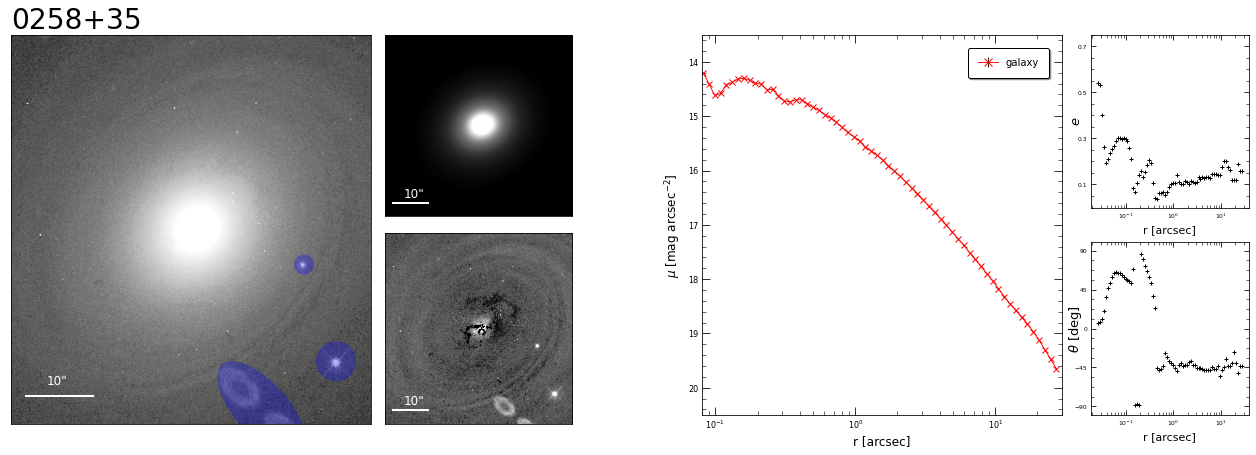

In [5]:
# 0258+35


def plot_masked_regions(axis_list):
    
    # x, y in 'Image' co-ordinates
    
    axis_list[0].plot([233,333], [121, 121], lw=2, color='w')      #[x1,x2], [y1,y2]
    axis_list[1].plot([233,333], [121, 121], lw=2, color='w')
    axis_list[2].plot([233,333], [121, 121], lw=2, color='w')
    
    patches = []
    
    ellipse = mpatches.Ellipse((587,101), 180, 80, angle=132)
    #axis.add_patch(ellipse)
    patches.append(ellipse)
    
    circle1 = mpatches.Circle((698,173), 30)
    patches.append(circle1)
    
    circle2 = mpatches.Circle((650,317), 15)
    patches.append(circle2)
    
    collection = PatchCollection(patches, facecolor='blue', alpha=0.3)
    axis_list[0].add_collection(collection)



norm = list(range(3))
#norm[0] = ImageNormalize(stretch=LinearStretch(), vmin=-200, vmax=9000)   --> core
norm[0] = ImageNormalize(stretch=AsinhStretch(), vmin=-60, vmax=1300)
norm[1] = ImageNormalize(stretch=LinearStretch(), vmin=100, vmax=1500)
norm[2] = ImageNormalize(stretch=AsinhStretch(), vmin=-50, vmax=500)

x1 = 210 
x2 = 750
y1 = 80
y2 = 660

axes = plot()
plot_galfit_images(source[0], axes, norm, x1, x2, y1, y2)

column_headers = ['SMA', 'ellip', 'ellip_err', 'pa', 'pa_err', 'tflux_e']
df = pd.read_table(iso_mod_file[0], sep='\s+', names=column_headers, usecols=[0,4,5,6,7,13], skiprows=[0])
plot_isophote_data(df, axes)

#plt.savefig('0258+394_fit.pdf', dpi=1000, facecolor='w', bbox_inches='tight') # saving in pdf preserves resolution


Filename: /Users/orion/phd_research/galfit/optical/0258+35/0258+35_finalfit.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (990, 730)   float32   
  1                1 ImageHDU       407   (990, 730)   float32   
  2                1 ImageHDU        61   (990, 730)   float32   
  3                1 ImageHDU         6   (990, 730)   float32   


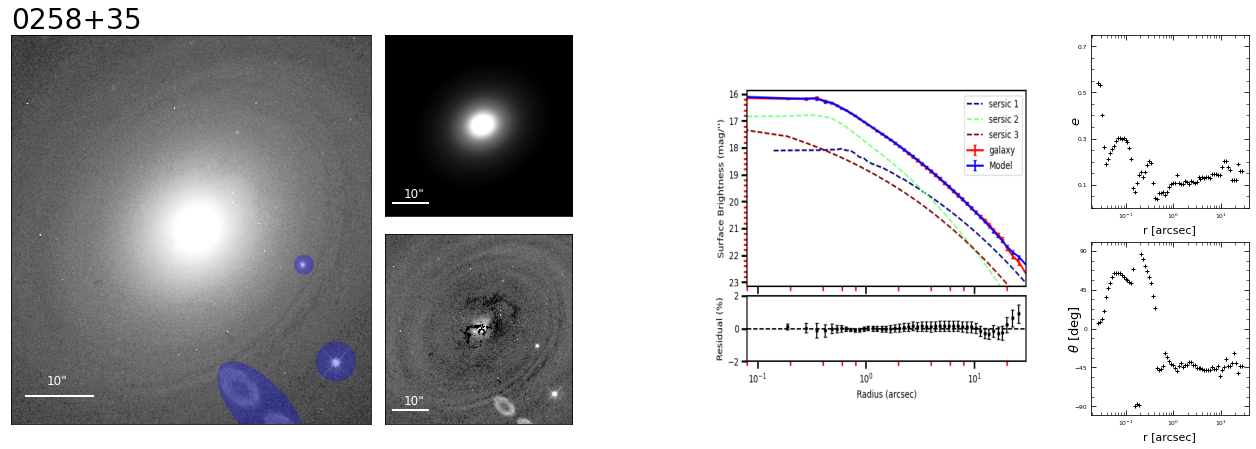

In [8]:
# 0258+35


def format_axis_isophotes(ax):
       
    #for Ellipsect figure as imshow
    #ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False,
    #                 bottom=False, top=False, left=False, right=False)
    ax.axis('off')
    

def plot_isophote_data(df, axis_list):
    
    sma = df['SMA']*0.05
    ellip = df['ellip']
    pa = df['pa']

    img = mpimg.imread('trial.png')
    axis_list[3].imshow(img)#, extent=(0, img.shape[1], 0,img.shape[0]+200))
    axis_list[3].set_aspect(1.3)
 
    axis_list[4].plot(sma, ellip, color='k', linestyle='none',marker='+',markersize=4, fillstyle='none')
    axis_list[4].set_ylim(0, 0.75)
    axis_list[4].set_xscale('log')

    axis_list[5].plot(sma, pa, color='k', linestyle='none',marker='+',markersize=4,fillstyle='none')
    axis_list[5].set_ylim(-100, 100)
    axis_list[5].set_xscale('log')
    
    
    
def plot_masked_regions(axis_list):
    
    # x, y in 'Image' co-ordinates
    
    axis_list[0].plot([233,333], [121, 121], lw=2, color='w')      #[x1,x2], [y1,y2]
    axis_list[1].plot([233,333], [121, 121], lw=2, color='w')
    axis_list[2].plot([233,333], [121, 121], lw=2, color='w')
    
    patches = []
    
    ellipse = mpatches.Ellipse((587,101), 180, 80, angle=132)
    #axis.add_patch(ellipse)
    patches.append(ellipse)
    
    circle1 = mpatches.Circle((698,173), 30)
    patches.append(circle1)
    
    circle2 = mpatches.Circle((650,317), 15)
    patches.append(circle2)
    
    collection = PatchCollection(patches, facecolor='blue', alpha=0.3)
    axis_list[0].add_collection(collection)



norm = list(range(3))
#norm[0] = ImageNormalize(stretch=LinearStretch(), vmin=-200, vmax=9000)   --> core
norm[0] = ImageNormalize(stretch=AsinhStretch(), vmin=-60, vmax=1300)
norm[1] = ImageNormalize(stretch=LinearStretch(), vmin=100, vmax=1500)
norm[2] = ImageNormalize(stretch=AsinhStretch(), vmin=-50, vmax=500)

x1 = 210 
x2 = 750
y1 = 80
y2 = 660

axes = plot()
plot_galfit_images(source[0], axes, norm, x1, x2, y1, y2)

column_headers = ['SMA', 'ellip', 'ellip_err', 'pa', 'pa_err', 'tflux_e']
df = pd.read_table(iso_mod_file[0], sep='\s+', names=column_headers, usecols=[0,4,5,6,7,13], skiprows=[0])
plot_isophote_data(df, axes)

#plt.savefig('0258+394_fit.pdf', dpi=1000, facecolor='w', bbox_inches='tight') # saving in pdf preserves resolution

